In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk
import string
import unicodedata
import seaborn as sns

# from unidecode import unidecode

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Copy of cleaned_30kundersampling.csv")

In [6]:
df

,Unnamed: 0,id,comment_text,severe_toxic,toxic,cleaned_text,count
0,0,c436fcdd4acc928a,naw i am fine see you later guys you rock ) ha...,0,0,nope fine see later guy rock hahahahaha userbi...,44
1,1,17bb9f8b0e2ff008,LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1,0,0,lol reddit pwn lmao unknowntales,28
2,2,e86ae38d7ff0c1ff,You jumped the gun a bit too early - that's my...,0,0,jump gun bit early first revert hour,30
3,3,cb1fcb465bd93930,"No way, Mercedez PWNZ!!",0,0,way mercedez pwnz,15
4,4,140cb8dc1570e423,I noticed it doesn't mention if the real Presi...,0,0,notice mention real president shot,30
...,...,...,...,...,...,...,...
30583,30583,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",0,1,previous conversation fuck shit eating liberal...,804
30584,30584,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,0,1,mischievious pubic hair,21
30585,30585,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,0,1,absurd edits absurd edit great white shark tot...,178
30586,30586,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",0,1,hey listen ever delete edits ever annoy wwe k ...,213


In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df['cleaned_text'].values.astype('U'))
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df.index
df_dtm.head(3)


Bigram Word Cloud

In [13]:
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Non Toxic Bigram

In [14]:
df1 = df[df["toxic"] == 0].cleaned_text
df1.apply(str)
df1.dropna(inplace=True)
text = pd.Series(" ".join(df1))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)
token

counter = Counter(ngrams(token,2))
most_common = counter.most_common(10)
most_common = dict(most_common)
nontoxic_common_bi = pd.DataFrame(most_common.items(), columns = ["bigram", "count"])
nontoxic_common_bi["bigram"] = nontoxic_common_bi["bigram"].apply(lambda x: " ".join(x))
nontoxic_common_bi

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,bigram,count
0,talk page,1578
1,taco taco,752
2,can not,722
3,oh no,625
4,no oh,624
5,speedy deletion,458
6,best best,434
7,would like,418
8,wikipediahi wikipediahi,355
9,reliable source,332


<function matplotlib.pyplot.show>

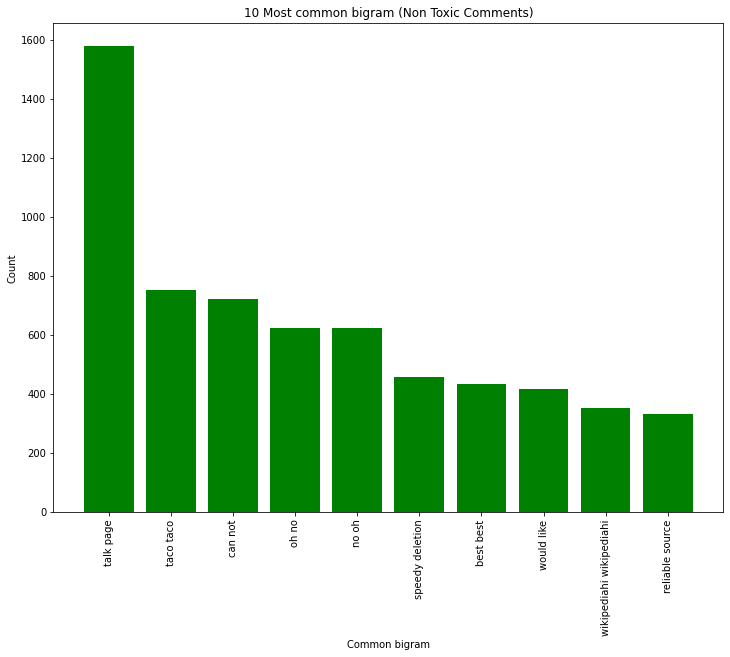

In [15]:
plt.figure(figsize=(12,9))
plt.bar(nontoxic_common_bi["bigram"], nontoxic_common_bi["count"], color="green") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common bigram (Non Toxic Comments)")
plt.show

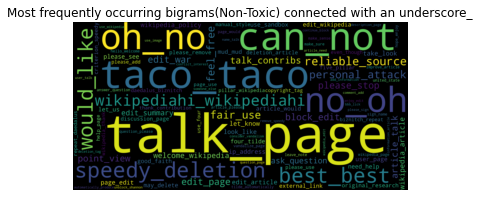

In [16]:
stopWords = stopwords.words('english')

text = word_tokenize(text)

text_content = [word for word in text if word not in stopWords]

# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(text)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
# word_dict is the dictionary we'll use for the word cloud.
# Load dictionary with the FOR loop below.
# The dictionary will look like this with the bigram and the score from above.
# word_dict = {'bigram A': 0.000697411,
#&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'bigram B': 0.000524882}
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 1500
WC_width = 3000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring bigrams(Non-Toxic) connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Toxic Bigram

In [17]:
df2 = df[df["severe_toxic"] == 0].cleaned_text
df2.apply(str)
df2.dropna(inplace=True)
text = pd.Series(" ".join(df2))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)
token

counter = Counter(ngrams(token,2))
most_common = counter.most_common(10)
most_common = dict(most_common)
modtoxic_common_bi = pd.DataFrame(most_common.items(), columns = ["bigram", "count"])
modtoxic_common_bi["bigram"] = modtoxic_common_bi["bigram"].apply(lambda x: " ".join(x))
modtoxic_common_bi

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,bigram,count
0,talk page,2193
1,nigger nigger,1572
2,can not,1447
3,moron hi,1299
4,hi moron,1298
5,pig pig,1251
6,jew fat,1234
7,fat jew,1226
8,hate hate,1117
9,bark bark,999


<function matplotlib.pyplot.show>

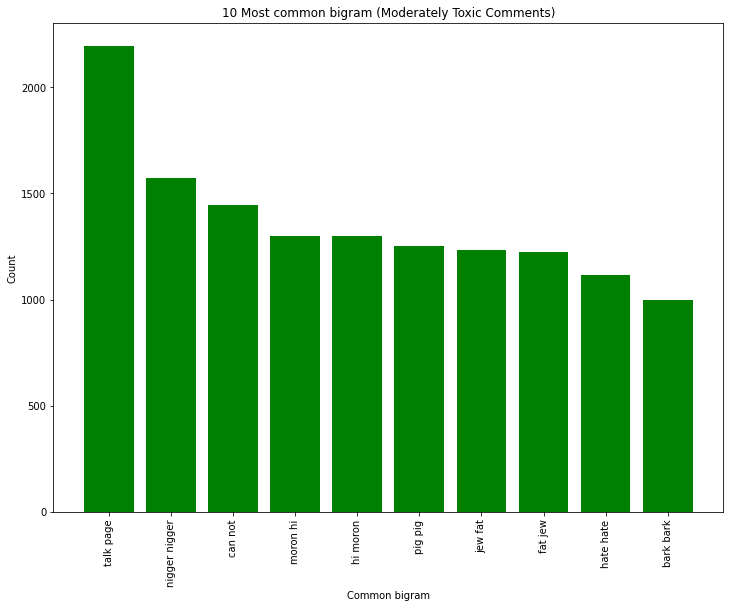

In [18]:
plt.figure(figsize=(12,9))
plt.bar(modtoxic_common_bi["bigram"], modtoxic_common_bi["count"], color="green") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common bigram (Moderately Toxic Comments)")
plt.show

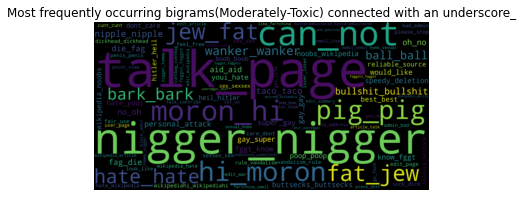

In [19]:
text = word_tokenize(text)

text_content = [word for word in text if word not in stopWords]

# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(text)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
# word_dict is the dictionary we'll use for the word cloud.
# Load dictionary with the FOR loop below.
# The dictionary will look like this with the bigram and the score from above.
# word_dict = {'bigram A': 0.000697411,
#&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'bigram B': 0.000524882}
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 1500
WC_width = 3000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring bigrams(Moderately-Toxic) connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Severely Toxic Bigram

In [20]:
df3 = df[df["severe_toxic"] == 1].cleaned_text
df3.apply(str)
df3.dropna(inplace=True)
text = pd.Series(" ".join(df3))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)
token

counter = Counter(ngrams(token,2))
most_common = counter.most_common(10)
most_common = dict(most_common)
sevtoxic_common_bi = pd.DataFrame(most_common.items(), columns = ["bigram", "count"])
sevtoxic_common_bi["bigram"] = sevtoxic_common_bi["bigram"].apply(lambda x: " ".join(x))
sevtoxic_common_bi

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,bigram,count
0,fuck fuck,1723
1,as as,1126
2,shit shit,1000
3,go fuck,936
4,suck suck,869
5,fuck go,845
6,faggot faggot,715
7,die die,632
8,fucksex fucksex,623
9,fuck yourselfgo,621


<function matplotlib.pyplot.show>

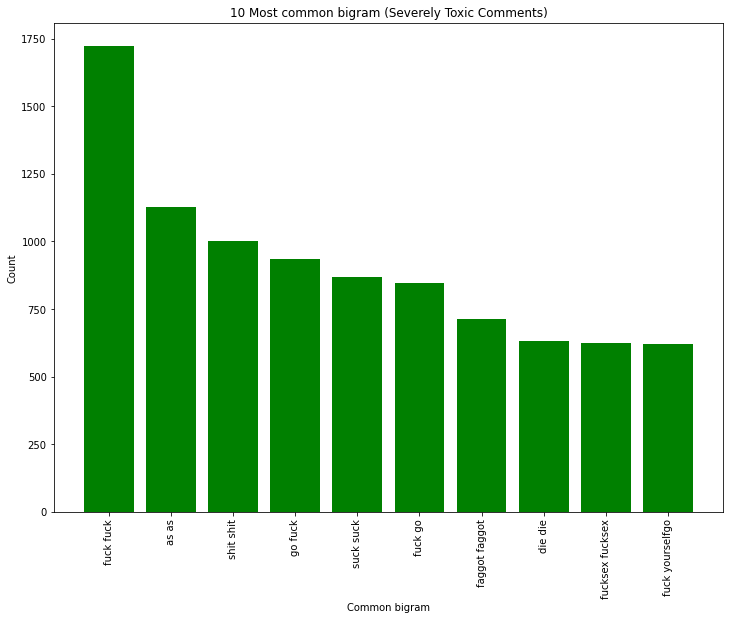

In [21]:
plt.figure(figsize=(12,9))
plt.bar(sevtoxic_common_bi["bigram"], sevtoxic_common_bi["count"], color="green") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common bigram (Severely Toxic Comments)")
plt.show

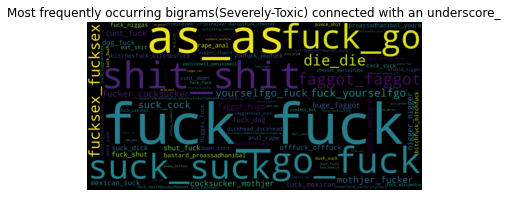

In [22]:
text = word_tokenize(text)

text_content = [word for word in text if word not in stopWords]

# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(text)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
# word_dict is the dictionary we'll use for the word cloud.
# Load dictionary with the FOR loop below.
# The dictionary will look like this with the bigram and the score from above.
# word_dict = {'bigram A': 0.000697411,
#&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'bigram B': 0.000524882}
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 1500
WC_width = 3000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring bigrams(Severely-Toxic) connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Trigram Analysis

Non Toxic Trigram

In [23]:
df1 = df[df["toxic"] == 0].cleaned_text
df1.apply(str)
df1.dropna(inplace=True)
text = pd.Series(" ".join(df1))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)
token

counter = Counter(ngrams(token,3))
most_common = counter.most_common(10)
most_common = dict(most_common)
nontoxic_common_tri = pd.DataFrame(most_common.items(), columns = ["trigram", "count"])
nontoxic_common_tri["trigram"] = nontoxic_common_tri["trigram"].apply(lambda x: " ".join(x))
nontoxic_common_tri

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,trigram,count
0,taco taco taco,751
1,oh no oh,624
2,no oh no,624
3,best best best,431
4,wikipediahi wikipediahi wikipediahi,354
5,article talk page,151
6,mud mud mud,142
7,criterion speedy deletion,130
8,repeat daedalus biznitch,127
9,daedalus biznitch repeat,126


<function matplotlib.pyplot.show>

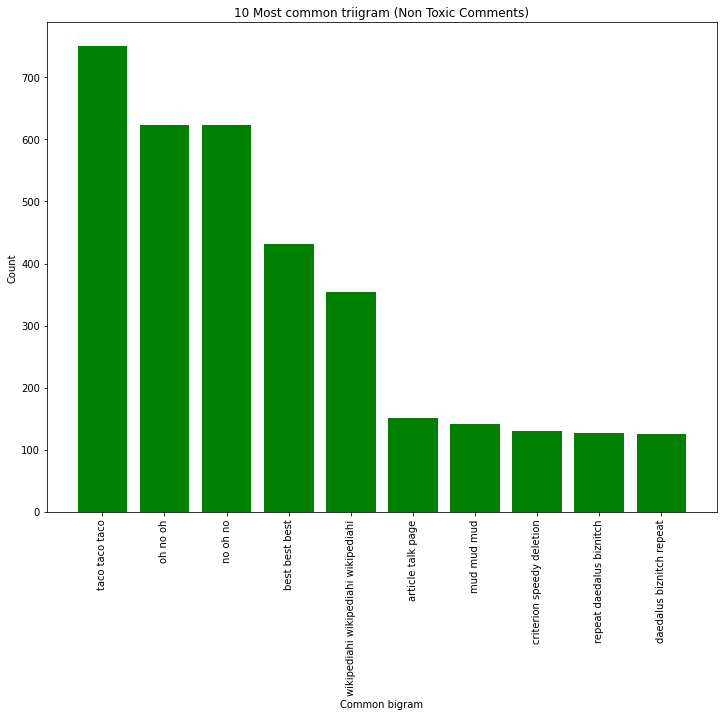

In [24]:
plt.figure(figsize=(12,9))
plt.bar(nontoxic_common_tri["trigram"], nontoxic_common_tri["count"], color="green") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common triigram (Non Toxic Comments)")
plt.show

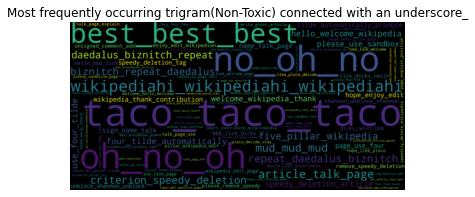

In [25]:
text = word_tokenize(text)

text_content = [word for word in text if word not in stopWords]

# setup and score the bigrams using the raw frequency.
finder = TrigramCollocationFinder.from_words(text)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 1500
WC_width = 3000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring trigram(Non-Toxic) connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Moderately Toxic Trigram

In [26]:
df2 = df[df["severe_toxic"] == 0].cleaned_text
df2.apply(str)
df2.dropna(inplace=True)
text = pd.Series(" ".join(df2))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)
token

counter = Counter(ngrams(token,3))
most_common = counter.most_common(10)
most_common = dict(most_common)
modtoxic_common_tri = pd.DataFrame(most_common.items(), columns = ["trigram", "count"])
modtoxic_common_tri["trigram"] = modtoxic_common_tri["trigram"].apply(lambda x: " ".join(x))
modtoxic_common_tri

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,trigram,count
0,nigger nigger nigger,1562
1,hi moron hi,1295
2,moron hi moron,1293
3,pig pig pig,1248
4,fat jew fat,1226
5,jew fat jew,1224
6,hate hate hate,1084
7,bark bark bark,998
8,wanker wanker wanker,960
9,ball ball ball,831


<function matplotlib.pyplot.show>

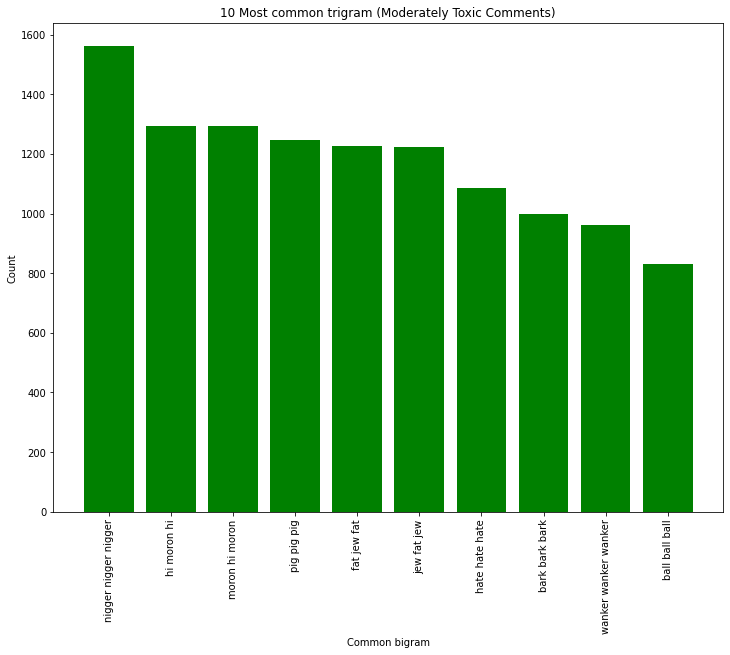

In [27]:
plt.figure(figsize=(12,9))
plt.bar(modtoxic_common_tri["trigram"], modtoxic_common_tri["count"], color="green") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common trigram (Moderately Toxic Comments)")
plt.show

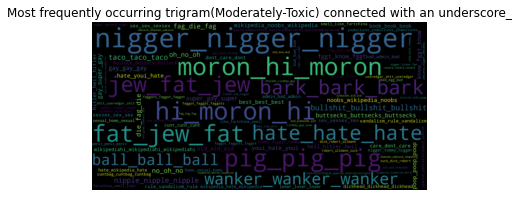

In [28]:
text = word_tokenize(text)

text_content = [word for word in text if word not in stopWords]

# setup and score the bigrams using the raw frequency.
finder = TrigramCollocationFinder.from_words(text)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 1500
WC_width = 3000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring trigram(Moderately-Toxic) connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Severely Toxic Trigram

In [29]:
df3 = df[df["severe_toxic"] == 1].cleaned_text
df3.apply(str)
df3.dropna(inplace=True)
text = pd.Series(" ".join(df3))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)
token

counter = Counter(ngrams(token,3))
most_common = counter.most_common(10)
most_common = dict(most_common)
sevtoxic_common_tri = pd.DataFrame(most_common.items(), columns = ["trigram", "count"])
sevtoxic_common_tri["trigram"] = sevtoxic_common_tri["trigram"].apply(lambda x: " ".join(x))
sevtoxic_common_tri

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,trigram,count
0,fuck fuck fuck,1629
1,as as as,1124
2,shit shit shit,999
3,suck suck suck,861
4,fuck go fuck,827
5,go fuck go,822
6,faggot faggot faggot,711
7,fucksex fucksex fucksex,622
8,fuck yourselfgo fuck,621
9,yourselfgo fuck yourselfgo,619


<function matplotlib.pyplot.show>

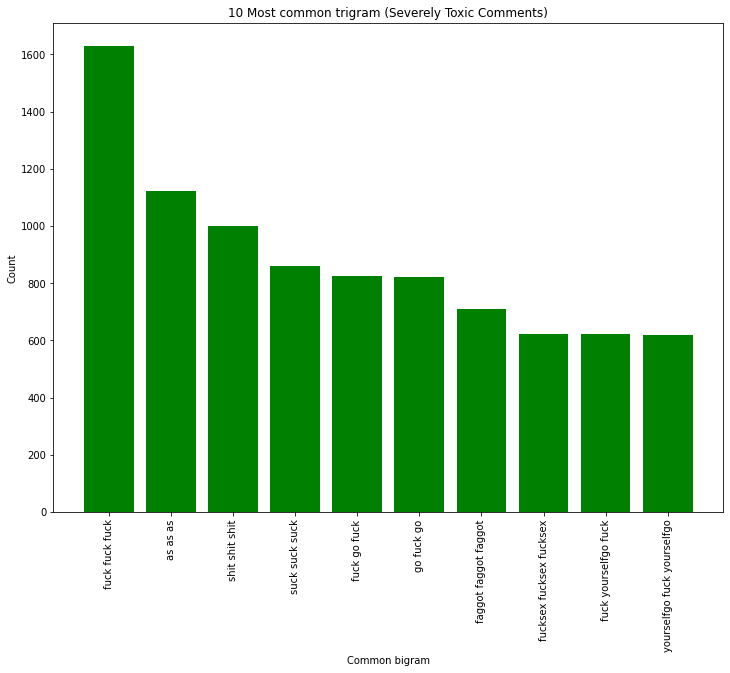

In [30]:
plt.figure(figsize=(12,9))
plt.bar(sevtoxic_common_tri["trigram"], sevtoxic_common_tri["count"], color="green") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common trigram (Severely Toxic Comments)")
plt.show

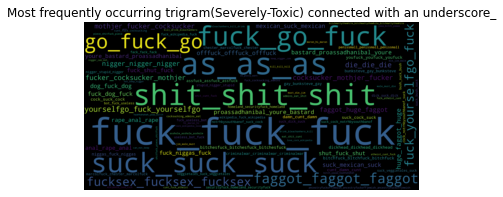

In [31]:
text = word_tokenize(text)

text_content = [word for word in text if word not in stopWords]

# setup and score the bigrams using the raw frequency.
finder = TrigramCollocationFinder.from_words(text)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 1500
WC_width = 3000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring trigram(Severely-Toxic) connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()